In [1]:
import warnings
#warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import copy
import json
import pandas as pd
import os
import sys
import featuretools as ft
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

sys.path.append('../../')
from Trane import trane as trane
from datetime import datetime, timedelta

In [2]:
#case_folder = 'youtube_pts'
#os.makedirs(case_folder, exist_ok=True)
#os.chdir(case_folder)

### Upload of the dataset and metadata

In [3]:
df = pd.read_csv('./youtube/USvideos.csv', sep=',')
df['trending_date'] = df['trending_date'].apply(lambda x: datetime.strptime(x, "%y.%d.%m"))
df = df.sort_values(by=['trending_date'])
df = df.fillna(0)
meta = trane.TableMeta(json.loads(open('./youtube/meta.json').read()))

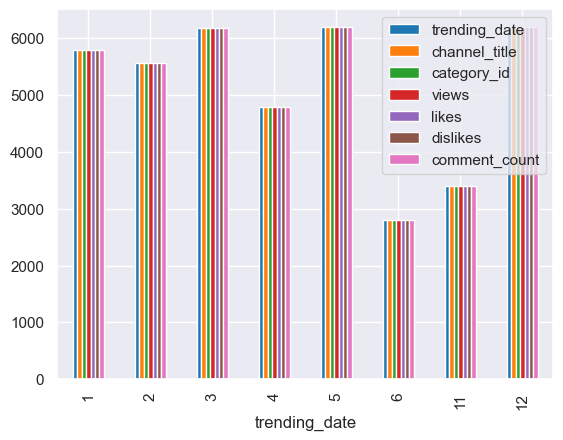

In [14]:
df.groupby(df["trending_date"].dt.month).count().plot(kind="bar").figure

In [5]:
df.head(5)

,trending_date,channel_title,category_id,views,likes,dislikes,comment_count
0,2017-11-14,CaseyNeistat,22,748374,57527,2966,15954
127,2017-11-14,theneedledrop,10,98422,2926,106,798
128,2017-11-14,Simon's Cat,15,426078,19323,245,945
129,2017-11-14,Andy Grammer,10,33315,1365,24,91
130,2017-11-14,RemyMaVEVO,10,1231518,32648,6221,9288
...,...,...,...,...,...,...,...
40818,2018-06-14,CaseyNeistat,22,2410536,136888,3318,17004
40819,2018-06-14,TheInternetVEVO,10,1615678,92403,1856,4572
40820,2018-06-14,Epicurious,26,903651,11427,2305,2504
40810,2018-06-14,TED-Ed,27,418311,20551,738,1320


### Defining entity column, time column and cutoff strategy

In [4]:
entity = "category_id"
time = "trending_date"
cutoff = '4d'
cutoff_base = pd.Timestamp(datetime.strptime("2017-11-14", "%Y-%m-%d"))
cutoff_end = pd.Timestamp(datetime.strptime("2018-06-14", "%Y-%m-%d"))
cutoff_strategy = trane.FixWindowCutoffStrategy(entity, cutoff, cutoff_base, cutoff_end)

problem_generator = trane.PredictionProblemGenerator(table_meta=meta, 
                                                     entity_col=entity,
                                                     cutoff_strategy=cutoff_strategy,
                                                     time_col=time)

problems = problem_generator.generate(df, generate_thresholds=True)

Success/Attempt = 450/775


### Generating prediction problems

In [5]:
problem_generator = trane.PredictionProblemGenerator(table_meta=meta,
                                                     entity_col=entity,
                                                     time_col=time,
                                                     cutoff_strategy=cutoff_strategy)

problems = problem_generator.generate(df, generate_thresholds=True)

Success/Attempt = 450/775


### Labeling the prediction tasks

In [6]:
for p in problems:
    try:
        x = p.execute(df,-1)
        problem_label_dict[str(p)]=x
    except:
        pass

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_i

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_i

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_id: 16/16 
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████| category_i